In [4]:
%pip install torch torchvision matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 36.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [6]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

57.7%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


In [7]:
classes = trainset.classes

In [8]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True
)

In [10]:
images, labels = next(iter(trainloader))
images[0].shape

torch.Size([3, 32, 32])

In [11]:
labels.shape

torch.Size([4])

## Visualization

In [12]:
def imshow(img):
    img = np.transpose(img, (1,2,0))
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()

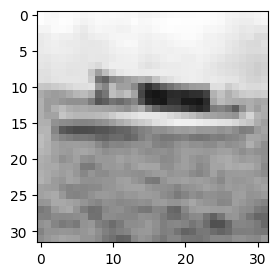

In [13]:
img = images[0]
imshow(img)

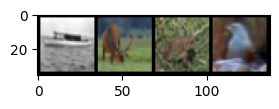

ship
deer
frog
bird


In [14]:
imshow(torchvision.utils.make_grid(images))
for i in range(4):
    print(classes[labels[i]])

## Single CNN

In [15]:
import torch.nn as nn

In [16]:
class SingleCNN(nn.Module):
    def __init__(self):
        super(SingleCNN,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3)
        
        
    def forward(self,x):
        return self.conv1(x)

In [17]:
net = SingleCNN()
out = net(images)
out[0].shape

torch.Size([16, 30, 30])

In [18]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


## what the kernel has learnt?

In [19]:
first_out = out[3,15,:,:]

In [20]:
first_out.shape

torch.Size([30, 30])

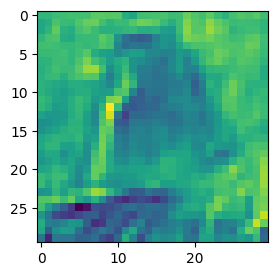

In [21]:
plt.figure(figsize=(3,3))
plt.imshow(first_out.detach())
plt.show()

## Deep CNN

In [109]:
class DeepCNN(nn.Module):

    def __init__(self):
        super(DeepCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,16,3), # padding = (1,1), stride = 2-> Size-> (N,3,32,32) -> (N,16,30,30)
            nn.AvgPool2d(2,stride=2), # Size -> (N,16,30,30) -> (N,16,15,15)
            nn.Conv2d(16,32,3) # Size -> (N,16,15,15) -> (N,32,13,13)
        )

    def forward(self,x):
        return self.model(x)

In [110]:
net = DeepCNN()
out = net(images)
out[0].shape

torch.Size([32, 13, 13])

In [111]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])


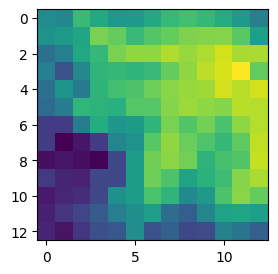

In [112]:
first_out = out[3,15,:,:]
plt.figure(figsize=(3,3))
plt.imshow(first_out.detach())
plt.show()

In [113]:
class LeNet(nn.Module): 
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0),-1) # flatten
        x = self.fc_model(x)
        return x


In [123]:
net = LeNet()
out = net(images)

In [126]:
torch.max(out.data,1)

torch.return_types.max(
values=tensor([0.1345, 0.1582, 0.1410, 0.1407]),
indices=tensor([2, 2, 2, 2]))